### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

### Reading data

In [ ]:
training_dataframe = pd.read_csv('train.csv')
testing_dataframe = pd.read_csv('test.csv')

### Data exploration and visualisation

In [3]:
training_dataframe.head()

,Unnamed: 0,Acoustic Firmness Index,Atmospheric Pressure at Harvest (Pa),Bitterness Scale,Circumference (mm),Color Intensity (a.u.),Find Distance from Main Vulcano (km),Length (mm),Luminescence Intensity (a.u.),Magnetic orientation (degree),Odor index (a.u.),Seed Count,Skin Thickness (mm),Soil pH where Grown,Sugar Content (mg),Weight (mg),pH,Edible
0,0,28.7,98741.0,0.0,222.897985,70.28,103.145212,35.481123,0.002636,61.877407,2.700236,71.355713,2.5,8.14,13792.0,87411.1826,5.090000,1.0
1,1,19.4,96077.0,0.0,205.832386,66.48,102.005624,32.609013,0.015950,297.191998,9.618586,46.291493,2.0,7.63,12985.0,72608.1826,4.990000,1.0
2,2,22.1,109154.0,2.0,234.406576,69.92,37.847317,37.926057,0.000279,61.103057,7.970050,54.442385,1.5,8.03,10008.0,109375.1826,5.219156,0.0
3,3,28.0,105277.0,5.0,214.999623,64.05,100.118399,34.610539,0.002323,58.677047,68.116450,106.401880,4.5,7.43,11303.0,84958.7826,3.228828,0.0
4,4,22.6,103898.0,2.0,180.542626,53.63,63.590438,28.948902,0.008611,317.261190,7.953544,48.057754,5.0,6.71,11475.0,49717.1826,4.800000,1.0


In [16]:
training_dataframe.columns

Index(['Acoustic Firmness Index', 'Atmospheric Pressure at Harvest (Pa)',
       'Bitterness Scale', 'Circumference (mm)', 'Color Intensity (a.u.)',
       'Find Distance from Main Vulcano (km)', 'Length (mm)',
       'Luminescence Intensity (a.u.)', 'Magnetic orientation (degree)',
       'Odor index (a.u.)', 'Seed Count', 'Skin Thickness (mm)',
       'Soil pH where Grown', 'Sugar Content (mg)', 'Weight (mg)', 'pH',
       'Edible'],
      dtype='object')

In [19]:
print(training_dataframe.isnull().sum())

Acoustic Firmness Index                 3
Atmospheric Pressure at Harvest (Pa)    0
Bitterness Scale                        4
Circumference (mm)                      2
Color Intensity (a.u.)                  0
Find Distance from Main Vulcano (km)    2
Length (mm)                             4
Luminescence Intensity (a.u.)           1
Magnetic orientation (degree)           3
Odor index (a.u.)                       2
Seed Count                              1
Skin Thickness (mm)                     1
Soil pH where Grown                     3
Sugar Content (mg)                      3
Weight (mg)                             4
pH                                      4
Edible                                  0
dtype: int64


In [17]:
training_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Acoustic Firmness Index               1245 non-null   float64
 1   Atmospheric Pressure at Harvest (Pa)  1248 non-null   float64
 2   Bitterness Scale                      1244 non-null   float64
 3   Circumference (mm)                    1246 non-null   float64
 4   Color Intensity (a.u.)                1248 non-null   float64
 5   Find Distance from Main Vulcano (km)  1246 non-null   float64
 6   Length (mm)                           1244 non-null   float64
 7   Luminescence Intensity (a.u.)         1247 non-null   float64
 8   Magnetic orientation (degree)         1245 non-null   float64
 9   Odor index (a.u.)                     1246 non-null   float64
 10  Seed Count                            1247 non-null   float64
 11  Skin Thickness (m

- There are a few null values, indicating the dataset has minimal missing data. However, we will need to handle the null values while performing data cleaning.
- All columns are numeric.

In [18]:
training_dataframe.describe()

,Acoustic Firmness Index,Atmospheric Pressure at Harvest (Pa),Bitterness Scale,Circumference (mm),Color Intensity (a.u.),Find Distance from Main Vulcano (km),Length (mm),Luminescence Intensity (a.u.),Magnetic orientation (degree),Odor index (a.u.),Seed Count,Skin Thickness (mm),Soil pH where Grown,Sugar Content (mg),Weight (mg),pH,Edible
count,1245.000000,1248.000000,1244.000000,1246.000000,1248.000000,1246.000000,1244.000000,1247.000000,1245.000000,1246.000000,1247.000000,1247.000000,1245.000000,1245.000000,1244.000000,1244.000000,1248.000000
mean,21.570077,101327.543269,1.808682,211.046062,63.300962,44.188204,33.589646,0.002850,178.933737,16.602442,48.926812,3.839615,7.278739,11835.978313,78446.779224,4.614780,0.494391
std,8.131888,4772.582203,1.960279,24.652278,7.118135,28.331532,3.874355,0.003607,102.113321,14.882420,35.871733,1.483029,0.529815,2417.733775,26637.766132,0.993407,0.500169
min,0.600000,83825.000000,0.000000,145.867667,46.060000,2.550790,23.451799,0.000004,0.085357,1.722825,0.000000,1.000000,5.710000,4566.000000,32352.182600,-5.120000,0.000000
25%,17.300000,98095.750000,0.000000,192.982222,58.577500,21.203453,30.777936,0.000627,90.582930,7.615908,15.852008,3.000000,6.910000,10353.000000,57087.682600,4.174979,0.000000
50%,21.300000,101357.000000,1.000000,212.429730,62.390000,38.880858,33.784401,0.001757,180.043851,12.258785,47.932723,4.000000,7.280000,11807.000000,77440.682600,4.910000,0.000000
75%,25.300000,104470.750000,3.000000,226.313333,67.202500,60.680816,36.049083,0.003767,266.481765,20.302048,80.413165,5.000000,7.660000,13534.000000,92664.102600,5.080000,1.000000
max,156.520701,115636.000000,7.000000,274.719407,97.810000,109.952511,43.691515,0.044624,359.443812,152.041780,112.968004,8.500000,8.980000,18246.000000,164679.342600,6.081918,1.000000


- Atmospheric pressure appears to be relatively consistent, hence this might be a less impactful feature in model training.
- In contrast, "Find Distance from Main Volcano" variable, shows a wide range of distances, which might suggest higher correlation with target variable.
- Features such as circumference, seed count, skin thickness, sugar content, and odor index are likely to be highly relevant for predicting edibility as they directly relate to the physical characteristics and nutritional aspects of the entities.

In [81]:
training_dataframe.corr()

,Unnamed: 0,Acoustic Firmness Index,Atmospheric Pressure at Harvest (Pa),Bitterness Scale,Circumference (mm),Color Intensity (a.u.),Find Distance from Main Vulcano (km),Length (mm),Luminescence Intensity (a.u.),Magnetic orientation (degree),Odor index (a.u.),Seed Count,Skin Thickness (mm),Soil pH where Grown,Sugar Content (mg),Weight (mg),pH,Edible
Unnamed: 0,1.000000,0.013653,0.015427,-0.014587,0.050061,0.012409,0.005439,0.059907,0.033992,0.041080,0.009867,0.017324,-0.034616,0.006386,-0.048597,0.066923,-0.050388,-0.027218
Acoustic Firmness Index,0.013653,1.000000,0.025231,0.064172,0.178651,-0.113588,0.012285,0.185638,-0.075522,0.018498,0.066754,-0.002097,0.013642,0.037348,-0.233860,0.178148,-0.126274,-0.212252
Atmospheric Pressure at Harvest (Pa),0.015427,0.025231,1.000000,-0.058671,0.003648,-0.015430,-0.011929,-0.001297,0.007235,-0.026765,-0.023184,0.001568,-0.014136,0.049506,0.065929,0.000600,0.048864,0.083963
Bitterness Scale,-0.014587,0.064172,-0.058671,1.000000,0.237117,0.010532,0.070196,0.237738,-0.016764,-0.044201,0.158074,0.038534,0.034453,-0.001925,-0.280734,0.240685,-0.143351,-0.476519
Circumference (mm),0.050061,0.178651,0.003648,0.237117,1.000000,-0.035213,0.026286,0.991972,0.016114,-0.014462,0.343124,0.048510,0.059804,-0.007040,-0.256898,0.969006,-0.236957,-0.407436
Color Intensity (a.u.),0.012409,-0.113588,-0.015430,0.010532,-0.035213,1.000000,0.033145,-0.036846,-0.015068,0.000143,0.053229,-0.041428,-0.008376,0.303254,-0.006463,-0.026894,0.004455,-0.027073
Find Distance from Main Vulcano (km),0.005439,0.012285,-0.011929,0.070196,0.026286,0.033145,1.000000,0.027115,0.008402,-0.034145,0.052881,-0.012315,-0.040802,0.032250,0.021927,0.031433,0.016499,-0.000727
Length (mm),0.059907,0.185638,-0.001297,0.237738,0.991972,-0.036846,0.027115,1.000000,0.012405,-0.007533,0.345438,0.050165,0.058266,-0.005462,-0.263337,0.977999,-0.238806,-0.416811
Luminescence Intensity (a.u.),0.033992,-0.075522,0.007235,-0.016764,0.016114,-0.015068,0.008402,0.012405,1.000000,0.004923,0.104517,-0.005584,-0.051843,0.032673,0.130113,0.023120,-0.083963,0.158535
Magnetic orientation (degree),0.041080,0.018498,-0.026765,-0.044201,-0.014462,0.000143,-0.034145,-0.007533,0.004923,1.000000,-0.052715,0.015636,-0.014221,0.025715,-0.028599,-0.005713,-0.005559,0.013343


In [86]:
print("Dataset Dimensions:", training_dataframe.shape)

Dataset Dimensions: (1211, 17)


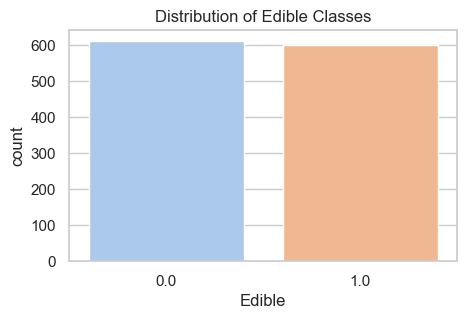

In [94]:
sns.set(style='whitegrid', palette='pastel')
plt.figure(figsize=(5, 3))
sns.countplot(data=training_dataframe, x='Edible')
plt.title('Distribution of Edible Classes')
plt.show()

In [89]:
class_distribution = training_dataframe['Edible'].value_counts(normalize=True)
print("\nClass Distribution:", class_distribution)


Class Distribution: Edible
0.0    0.504542
1.0    0.495458
Name: proportion, dtype: float64


- Distribution of both categores within our target variable ('Edible') is almost even.

### Data cleaning

- One clearly useless feature, the first one: Unnamed: 0. This column serves as an index, so it won't contribute to the ML model's training. 

In [48]:
training_dataframe.drop('Unnamed: 0', axis=1, inplace=True)     # 'axis' parameter to specify dropping column, 'inplace' to modify same DF.

Dropping all rows containing any missing value:

In [49]:
training_dataframe.dropna(inplace=True)     # Using inplace for permanent deletion

### Data Visualisation

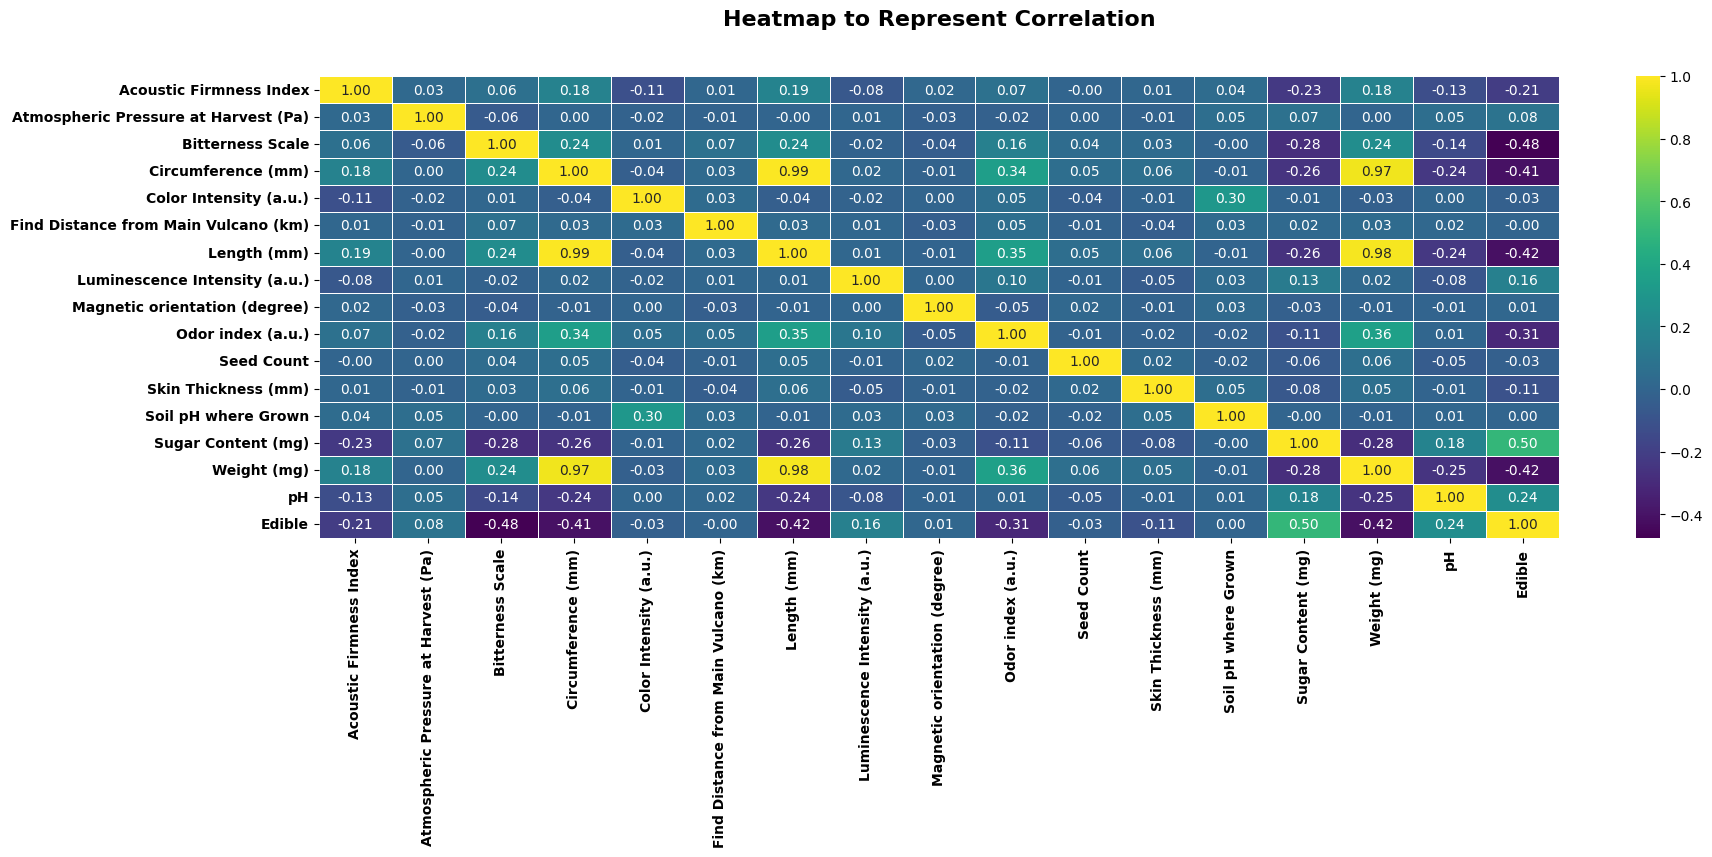

In [31]:
plt.figure(figsize=(20, 6))     # Setting plot size

# Using Seaborn's Heatmap function to create a heatmap to represent correlation between all numerical columns in our dataframe.
heatmap = sns.heatmap(training_dataframe.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)     # 'viridis' is the colour theme, set annotation to True, use 2 decimal places for annotations
plt.title('Heatmap to Represent Correlation\n', fontsize=16, fontweight='bold', loc='center', pad=20)       # Setting, emboldning, resizing, and centering the title

# Setting tick label values:
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10, fontweight='bold')      
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10, fontweight='bold')

plt.show()  

Positive Correlations:
- Circumference and Length have a very strong positive correlation (99%). This indicates that larger circumference lumifruits tend to have longer lengths, which is expected.
- Circumference and Sugar Content also show a positive correlation (97%). Larger lumifruits in terms of circumference tend to have higher sugar content, which can be a desirable trait.
- Color Intensity and Soil PH where Grown have a moderate positive correlation of about 30%. This suggests that certain soil PH levels might influence the color intensity of the lumifruits.

Negative Correlations:
- Color Intensity and Acoustic Firmness Index show a very weak negative correlation (-11%). Higher color intensity may be associated with lower acoustic firmness, indicating potential ripeness variations.
- Sugar Content and Acoustic Firmness Index show a weak negative correlation (-23%). Lumifruits with higher sugar content might have lower acoustic firmness, possibly indicating a trade-off between sweetness and firmness.

Correlation with Edibility:
- Bitterness Scale has a notable negative correlation (48%) with edibility, suggesting that higher bitterness is associated with lower edibility.
- Sugar Content also has a strong positive correlation (50%) with edibility.

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as

<Figure size 2000x800 with 0 Axes>

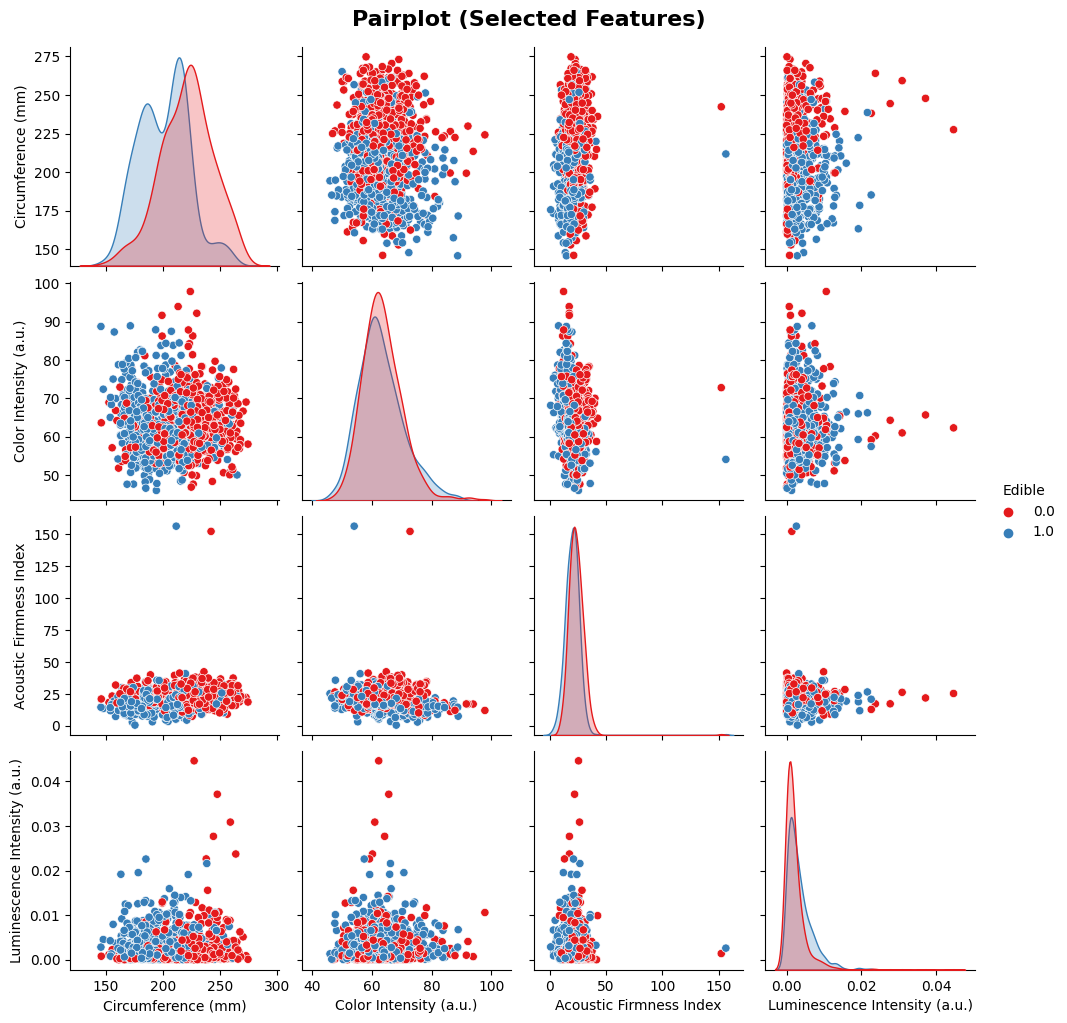

In [44]:
plt.figure(figsize=(20, 8))
pairplot = sns.pairplot(training_dataframe[['Circumference (mm)', 'Color Intensity (a.u.)', 'Acoustic Firmness Index', 'Luminescence Intensity (a.u.)', 'Edible']], hue='Edible', palette='Set1')
pairplot.fig.suptitle('Pairplot (Selected Features)', fontsize=16, fontweight='bold', y=1.02)
plt.show()

- Circumference varies among lumifruits, but there's no clear trend indicating size directly correlates with edibility.
- Color intensity shows variation and might be related to ripeness or nutrient content, potentially influencing edibility.
- Acoustic firmness index represents freshness and ripeness, suggesting a range of firmness for edible lumifruits.
- Luminescence intensity shows variation between edible and non-edible lumifruits, hinting at its importance in predicting edibility.

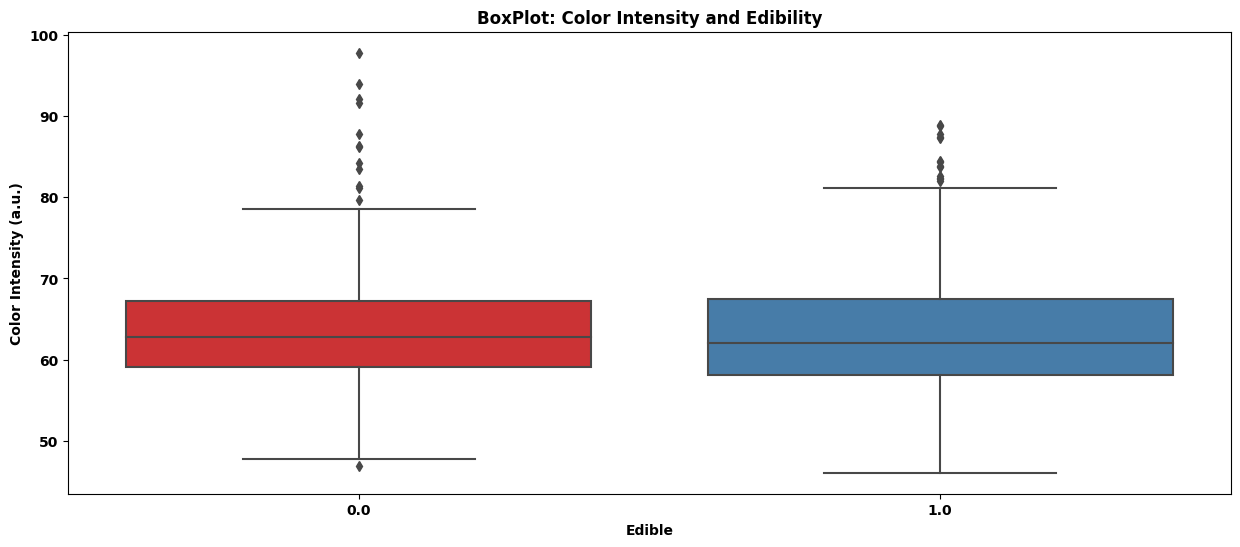

In [55]:
plt.figure(figsize=(15, 6))     # Setting figure size
sns.boxplot(x='Edible', y='Color Intensity (a.u.)', data=training_dataframe, palette='Set1')    # Using Seaborn's boxplot function on 2 features from our training df, and setting the red/blue colour theme using 'Set1' palette
plt.title('BoxPlot: Color Intensity and Edibility', fontweight='bold')      # Setting title and emboldening it 
plt.xlabel('Edible', fontweight='bold')
plt.ylabel('Color Intensity (a.u.)', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

- Similar Mean Color Intensity: Both edible and non-edible lumifruits exhibit similar mean color intensity, suggesting color alone may not decisively determine edibility.
- Variability in Color Intensity: Both groups show variability in color intensity, indicating a range of colors influenced by factors like ripeness and environmental conditions.
- Wide Range of Color Intensity: The minimum and maximum color intensity values indicate a wide range of color variations among lumifruits, with some exhibiting intense or unusual colors.
- Overlap in Color Intensity: There is overlap in color intensity ranges between edible and non-edible lumifruits, making color intensity alone insufficient for distinguishing between safe and harmful lumifruits.

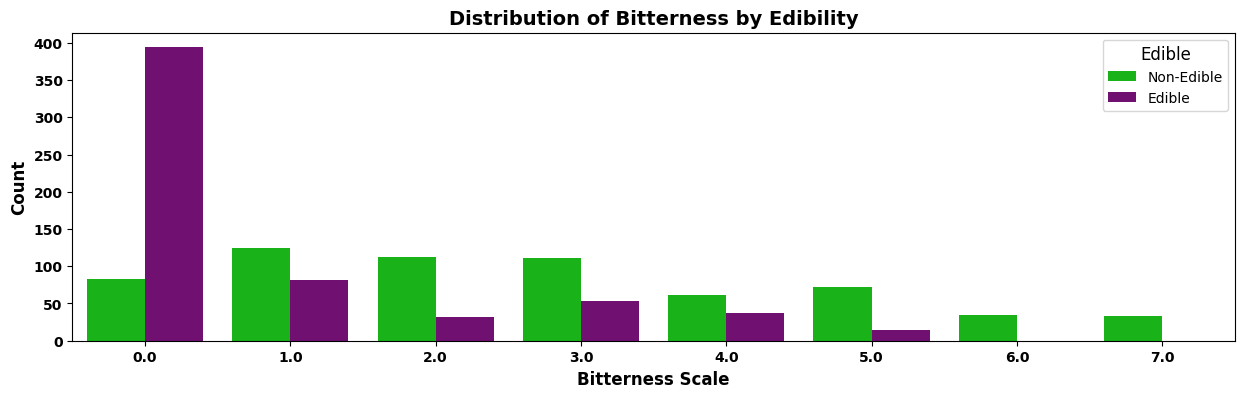

In [71]:
custom_palette = ["#00cc00", "#800080"]  # Custom colors for the plot
plt.figure(figsize=(15, 4))
sns.set_palette(custom_palette)  # Setting the custom color palette
sns.countplot(data=training_dataframe, x='Bitterness Scale', hue='Edible')
plt.title('Distribution of Bitterness by Edibility', fontsize=14, fontweight='bold')  # Embolden title and change fontsize
plt.xlabel('Bitterness Scale', fontsize=12, fontweight='bold')  # Embolden x-axis label
plt.ylabel('Count', fontsize=12, fontweight='bold')  # Embolden y-axis label
plt.xticks(fontweight='bold')  # Embolden x-axis tick values
plt.yticks(fontweight='bold')  # Embolden y-axis tick values
plt.legend(title='Edible', fontsize=10, title_fontsize='12', labels=['Non-Edible', 'Edible'])  # Custom legend
plt.show()

- Lumifruits with higher bitterness scales (3.0 to 7.0) are more likely to be non-edible, indicating a potential threshold for inedibility.
- Lower bitterness scales (0.0 to 2.0) are associated with edible lumifruits, suggesting a safer consumption profile.
- Higher bitterness scales show discrepancies in distribution.

### Data Preprocessing

    Feature Engineering:

New Feature 1: Atmospheric Pressure Square

In [50]:
training_dataframe['Atmospheric Pressure Square'] = training_dataframe['Atmospheric Pressure at Harvest (Pa)'] ** 2

- Captures potential quadratic effects that the atmospheric pressure may have on the edibility of lumifruits. 
- By squaring this feature, we allow the model to capture _non-linear relationships_ between atmospheric pressure and edibility.

New Feature 2: Soil PH Cube

In [51]:
training_dataframe['Soil pH Cube'] = training_dataframe['Soil pH where Grown'] ** 3

- The motivation behind creating the soil PH cube feature is to capture complex relationships between soil PH levels and edibility outcomes. 
- Just like we did by squaring the atmoshperic pressure, we account for potential non-linear effects and interactions among different PH levels that may impact the edibility of lumifruits.

New Feature 3: Freshness Index

In [52]:
# Freshness index based on: acoustic firmness, atmospheric pressure, distance from the main volcano.
training_dataframe['Freshness Index'] = training_dataframe['Acoustic Firmness Index'] + training_dataframe['Atmospheric Pressure at Harvest (Pa)'] + training_dataframe['Find Distance from Main Vulcano (km)']

- To incorporate multiple factors that are indicative of freshness, ripeness, and environmental conditions during growth. 
- Combining these factors into a freshness index allows the model to consider a holistic measure of freshness, which can be crucial in determining the edibility of lumifruits.

New Feature 4: Sweetness to Bitterness Ratio

In [53]:
training_dataframe['Sweetness to Bitterness Ratio'] = training_dataframe['Sugar Content (mg)'] / (training_dataframe['Bitterness Scale'] + 1)

- To capture the balance between desirable (sweetness) and undesirable (bitterness) taste components in lumifruits. 
- By calculating this ratio, we create a metric that represents the relative sweetness considering the perceived bitterness. 
- Can help the model differentiate between lumifruits that are more palatable and those that may have a less desirable taste profile.

In [160]:
training_dataframe.head()

,Acoustic Firmness Index,Atmospheric Pressure at Harvest (Pa),Bitterness Scale,Circumference (mm),Color Intensity (a.u.),Find Distance from Main Vulcano (km),Length (mm),Luminescence Intensity (a.u.),Magnetic orientation (degree),Odor index (a.u.),...,Skin Thickness (mm),Soil pH where Grown,Sugar Content (mg),Weight (mg),pH,Edible,Atmospheric Pressure Square,Soil pH Cube,Freshness Index,Sweetness to Bitterness Ratio
0,28.7,98741.0,0.0,222.897985,70.28,103.145212,35.481123,0.002636,61.877407,2.700236,...,2.5,8.14,13792.0,87411.1826,5.090000,1.0,9.749785e+09,539.353144,98872.845212,13792.000000
1,19.4,96077.0,0.0,205.832386,66.48,102.005624,32.609013,0.015950,297.191998,9.618586,...,2.0,7.63,12985.0,72608.1826,4.990000,1.0,9.230790e+09,444.194947,96198.405624,12985.000000
2,22.1,109154.0,2.0,234.406576,69.92,37.847317,37.926057,0.000279,61.103057,7.970050,...,1.5,8.03,10008.0,109375.1826,5.219156,0.0,1.191460e+10,517.781627,109213.947317,3336.000000
3,28.0,105277.0,5.0,214.999623,64.05,100.118399,34.610539,0.002323,58.677047,68.116450,...,4.5,7.43,11303.0,84958.7826,3.228828,0.0,1.108325e+10,410.172407,105405.118399,1883.833333
4,22.6,103898.0,2.0,180.542626,53.63,63.590438,28.948902,0.008611,317.261190,7.953544,...,5.0,6.71,11475.0,49717.1826,4.800000,1.0,1.079479e+10,302.111711,103984.190438,3825.000000


    Outlier Detection:

- Utilizing z-score calculations to assess numerical columns, determining how data points deviate from their column means.
- Flagging outliers when absolute z-scores exceed 3.

In [54]:
# list containing the names of numerical columns
numerical_columns = ['Circumference (mm)', 'Seed Count', 'Skin Thickness (mm)', 'Sugar Content (mg)', 'Odor index (a.u.)', 'Soil pH where Grown']

def handle_outliers(df, columns):   # define a function to detect and handle outliers in the numerical columns.
    rows_dropped = {}  # Dictionary to store count of rows dropped for each column
    for column in columns:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())  # Calculate z-scores
        dropped_rows = df[z_scores >= 3]  # Filter rows with z-score >= 3 (outliers)
        df = df[z_scores < 3]  # Keep rows where z-score is less than 3 (not outliers)
        rows_dropped[column] = len(dropped_rows)  # Store count of rows dropped for this column
    return df, rows_dropped

# Apply outlier detection and display number of rows dropped for each column
filtered_df, rows_dropped_counts = handle_outliers(training_dataframe, numerical_columns)

# Show the number of rows dropped for each column
print("\nNumber of Rows Dropped for Each Column:\n")
for column, count in rows_dropped_counts.items():
    print(f"{column}: {count} rows dropped")


Number of Rows Dropped for Each Column:

Circumference (mm): 0 rows dropped
Seed Count: 0 rows dropped
Skin Thickness (mm): 1 rows dropped
Sugar Content (mg): 0 rows dropped
Odor index (a.u.): 25 rows dropped
Soil pH where Grown: 2 rows dropped


- Skin Thickness (mm): The presence of one outlier suggests that most data points in this column are relatively consistent, with only a minor deviation observed.
- Odor Index (a.u.): The significant number of outliers (25 rows dropped) in this column indicates a wide range of variation in odor intensity among the samples. 
- Soil pH where Grown: With two rows dropped as outliers, the data suggests a moderate level of variation in soil pH values where the samples were cultivated. 

    Standardization:

In [55]:
numerical_columns = training_dataframe.drop('Edible', axis=1).columns    # Since we have to standardize features only, and not the target variable.
scaler = StandardScaler()   # Creating an instance of StandardScaler class
training_dataframe[numerical_columns] = scaler.fit_transform(training_dataframe[numerical_columns])     # Fitting the datausing created instance to standardize it.
training_dataframe.head()

,Acoustic Firmness Index,Atmospheric Pressure at Harvest (Pa),Bitterness Scale,Circumference (mm),Color Intensity (a.u.),Find Distance from Main Vulcano (km),Length (mm),Luminescence Intensity (a.u.),Magnetic orientation (degree),Odor index (a.u.),...,Skin Thickness (mm),Soil pH where Grown,Sugar Content (mg),Weight (mg),pH,Edible,Atmospheric Pressure Square,Soil pH Cube,Freshness Index,Sweetness to Bitterness Ratio
0,0.865621,-0.541233,-0.918608,0.483108,0.990538,2.084421,0.489163,-0.048372,-1.147825,-0.934096,...,-0.906827,1.633205,0.811083,0.333789,0.474150,1.0,-0.557918,1.740846,-0.527444,1.354023
1,-0.271613,-1.097132,-0.918608,-0.209112,0.453905,2.044209,-0.252763,3.709811,1.152464,-0.469697,...,-1.245037,0.669654,0.477756,-0.220558,0.374327,1.0,-1.092248,0.622390,-1.085537,1.191136
2,0.058552,1.631655,0.098242,0.949923,0.939699,-0.219763,1.120740,-0.713593,-1.155395,-0.580356,...,-1.583247,1.425381,-0.751880,1.156303,0.603079,0.0,1.670857,1.487302,1.630499,-0.756441
3,0.780022,0.822638,1.623519,0.162732,0.110742,1.977613,0.264273,-0.136587,-1.179110,3.457011,...,0.446013,0.291791,-0.216986,0.241951,-1.383738,0.0,0.814944,0.222502,0.835687,-1.049550
4,0.119693,0.534881,0.098242,-1.234923,-1.360762,0.688641,-1.198246,1.638336,1.348648,-0.581464,...,0.784223,-1.068517,-0.145942,-1.077786,0.184662,1.0,0.517969,-1.047605,0.539173,-0.657740


### Modelling

In [56]:
X = training_dataframe.drop('Edible', axis=1)   # Create new df named X which contains only the ind. variables
y = training_dataframe['Edible']   # Create new df named Y which contains only the target variable ('Edible')

    Data Splitting and Hyperparameter Tuning:

In [57]:
# Model Selection: Vary random state of train-test split
ideal_parameters = []
best_scores = []

for i in range(10):
    random_state = 42 + i  # Varying random state in the loop
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y)

    # Manual Hyperparameter Tuning for AdaBoostClassifier
    ada_classifier = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)
    ada_classifier.fit(X_train, y_train)
    train_score = ada_classifier.score(X_train, y_train)
    test_score = ada_classifier.score(X_test, y_test)

    # Store the results for analysis
    ideal_parameters.append({'random_state': random_state, 'n_estimators': 200, 'learning_rate': 0.1})
    best_scores.append({'random_state': random_state, 'train_score': train_score, 'test_score': test_score})

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Iteration': np.arange(1, 11), 'Random_State': [params['random_state'] for params in ideal_parameters], 'Train_Score': [scores['train_score'] for scores in best_scores], 'Test_Score': [scores['test_score'] for scores in best_scores]})

# Print or display the results DataFrame
print(results_df)

# Prepare the DataFrame for the heatmap
pivot_df = results_df.pivot(index='Random_State', columns='Iteration', values='Test_Score')

   Iteration  Random_State  Train_Score  Test_Score
0          1            42     0.912633    0.909341
1          2            43     0.924439    0.865385
2          3            44     0.930342    0.887363
3          4            45     0.912633    0.909341
4          5            46     0.922078    0.870879
5          6            47     0.920897    0.895604
6          7            48     0.922078    0.901099
7          8            49     0.909091    0.901099
8          9            50     0.924439    0.879121
9         10            51     0.914994    0.895604


    Using heatmap to visualize the values for easier analysis:

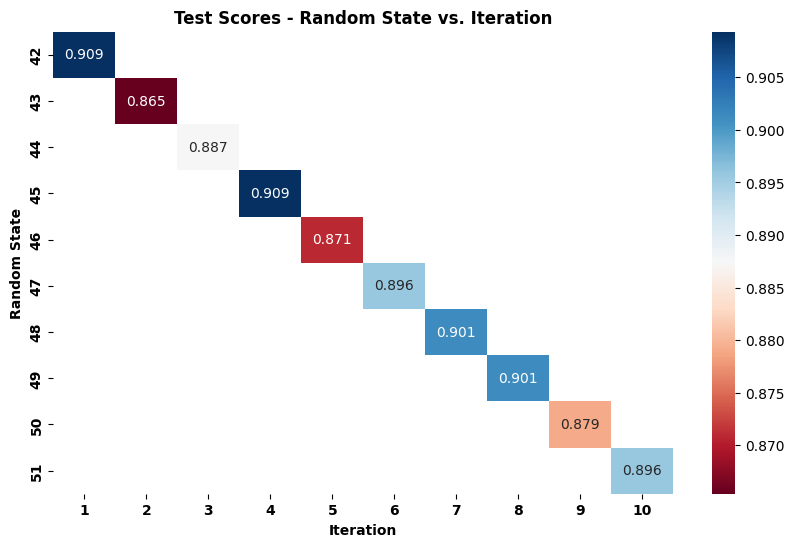

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt=".3f", cmap='RdBu')   # Using our pivot table, display data as annotations (3 decimal places) on a heatmap.

plt.title('Test Scores - Random State vs. Iteration', fontweight='bold')
plt.xlabel('Iteration', fontweight='bold')
plt.ylabel('Random State', fontweight='bold')

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

- Some cells in the heatmap show notably high test scores, indicating that the model performed well for certain combinations of random states and iterations. For example, the cell with a random state of 44 and iteration 3 has a test score of 0.887363, which suggests a successful model configuration.
- The heatmap reveals variability in test scores across different random states. For instance, comparing rows with similar iteration numbers but different random states, such as rows 2 and 8 (both representing iteration 3), we see differences in test scores (0.887363 vs. 0.879121). 
- Some cells exhibit consistent test scores across iterations or random states. For instance, rows with iteration numbers 4, 7, and 8 (corresponding to random states 45, 48, and 49) all have test scores around 0.901099.

    Selecting Best Hyperparameters and Training Final Model:

In [58]:
best_hyperparameters = None
best_score = 0 

# Iterate over the results to find the best hyperparameters
for params, scores in zip(ideal_parameters, best_scores):
    if scores['test_score'] > best_score:
        best_score = scores['test_score']
        best_hyperparameters = params

# Train the final model using the best hyperparameters found
final_model = AdaBoostClassifier(n_estimators=best_hyperparameters['n_estimators'],
                                 learning_rate=best_hyperparameters['learning_rate'],
                                 random_state=best_hyperparameters['random_state'])
final_model.fit(X, y)

# Calculate the accuracy score on the entire dataset
y_pred = final_model.predict(X)
average_score = accuracy_score(y, y_pred)

# Print the model information and scores
print("Best Hyperparameters:", best_hyperparameters)
print("Best Average Score:", average_score)

Best Hyperparameters: {'random_state': 42, 'n_estimators': 200, 'learning_rate': 0.1}
Best Average Score: 0.9157720891824938


### Final evaluation

    Performing the same preprocessing on test data, as done on train data:

In [59]:
# Data Cleaning:
testing_dataframe.dropna(inplace=True)

# Creating new features:
testing_dataframe['Atmospheric Pressure Square'] = testing_dataframe['Atmospheric Pressure at Harvest (Pa)'] ** 2
testing_dataframe['Soil pH Cube'] = testing_dataframe['Soil pH where Grown'] ** 3
testing_dataframe['Freshness Index'] = testing_dataframe['Acoustic Firmness Index'] + testing_dataframe['Atmospheric Pressure at Harvest (Pa)'] + testing_dataframe['Find Distance from Main Vulcano (km)']
testing_dataframe['Sweetness to Bitterness Ratio'] = testing_dataframe['Sugar Content (mg)'] / (testing_dataframe['Bitterness Scale'] + 1)

# Apply outlier detection and display number of rows dropped for each column
filtered_df, rows_dropped_counts = handle_outliers(testing_dataframe, numerical_columns)

results = pd.DataFrame()        # Making a new dataframe to store predictions
extracted_column = filtered_df['Unnamed: 0']     # Extracting the index from testing_dataframe
results['index'] = extracted_column    # Adding index to 'results' DataFrame

filtered_df.drop('Unnamed: 0', axis=1, inplace=True)

# Use the same scaler fitted on the training data to scale the test data:
numerical_columns_test = filtered_df.columns  # No need to drop the target variable 'Edible'
filtered_df[numerical_columns_test] = scaler.transform(filtered_df[numerical_columns_test])

filtered_df.head()

,Acoustic Firmness Index,Atmospheric Pressure at Harvest (Pa),Bitterness Scale,Circumference (mm),Color Intensity (a.u.),Find Distance from Main Vulcano (km),Length (mm),Luminescence Intensity (a.u.),Magnetic orientation (degree),Odor index (a.u.),Seed Count,Skin Thickness (mm),Soil pH where Grown,Sugar Content (mg),Weight (mg),pH,Atmospheric Pressure Square,Soil pH Cube,Freshness Index,Sweetness to Bitterness Ratio
0,-0.161558,-1.056024,0.606668,0.251372,1.113398,-0.575439,0.213505,-0.350619,1.385643,-0.275076,0.290480,0.446013,0.140646,-0.672988,0.181914,0.653544,-1.053235,0.068446,-1.059731,-0.915140
1,-1.188736,0.090204,-0.410183,0.644259,-0.387761,0.489416,0.602039,0.695779,-1.590061,-0.336794,0.833111,0.446013,0.783013,-0.124464,0.499400,-1.237432,0.066747,0.746528,0.091072,-0.266469
3,1.501493,0.435346,0.606668,1.139242,0.684092,1.345948,1.152605,0.119597,1.194888,0.704735,0.289296,0.107803,-0.577295,-2.789431,1.173038,-0.760486,0.416155,-0.618631,0.445879,-1.173700
4,-0.027046,0.302840,-0.918608,0.141913,-1.677093,0.693547,0.374536,0.173215,1.270656,-0.362219,1.434398,1.122432,-0.501722,0.367886,0.311395,0.324415,0.281345,-0.549716,0.306903,1.137446
5,-0.357211,-1.383011,0.606668,1.828225,-0.726688,-0.261763,1.882492,-0.759606,1.086258,0.746436,-1.366832,0.107803,0.971945,-1.678753,2.226005,-0.759044,-1.361344,0.957771,-1.385206,-1.038011


    Prediction:

In [60]:
y_pred = final_model.predict(filtered_df)

In [61]:
results['Edible'] = y_pred.astype(int)    
results.head()

,index,Edible
0,0,1
1,1,0
3,3,0
4,4,1
5,5,0
